## Taking digitized response functions for a telescope and fitting a simple trapezium for quick integration in pylanet

In [247]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import pylanet.data as pydata
import pylanet.model as pymodel
import pylanet.plot as pyplot

import astropy
from astropy.io import ascii

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [248]:
#mpl.use('svg')
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['axes.facecolor']='whitesmoke'
mpl.rcParams['axes.edgecolor']='white'
mpl.rcParams['axes.linewidth']=3

mpl.rcParams['text.color'] = 'dimgrey'
mpl.rcParams['xtick.color']='k'
mpl.rcParams['ytick.color']='k'
mpl.rcParams['axes.labelcolor']='k'

mpl.rcParams['font.size']=12
mpl.rcParams['xtick.direction']='in'
mpl.rcParams['ytick.direction']='in'
mpl.rcParams['xtick.major.size'] = 5.5
mpl.rcParams['ytick.major.size'] = 5.5
mpl.rcParams['xtick.minor.size'] = 3.5
mpl.rcParams['ytick.minor.size'] = 3.5

mpl.rcParams["text.usetex"] = True

### Kepler data from http://spiff.rit.edu/classes/resceu/lectures/transit_ii/transit_ii.html

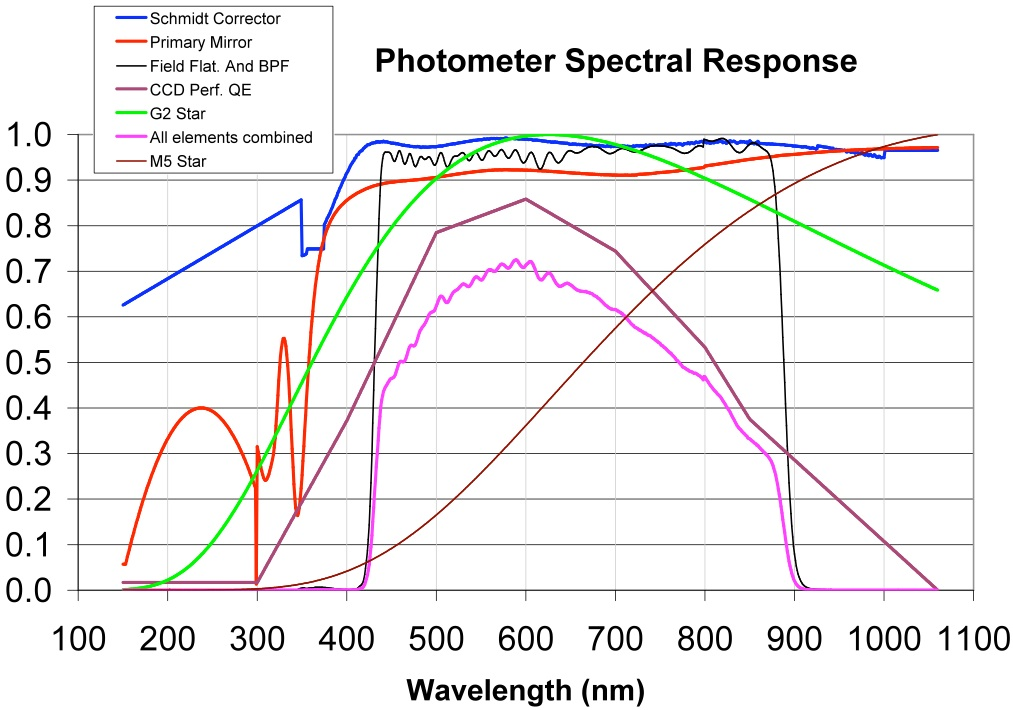

xs:  [4.00000000e-07 4.26315789e-07 4.52631579e-07 4.78947368e-07
 5.05263158e-07 5.31578947e-07 5.57894737e-07 5.84210526e-07
 6.10526316e-07 6.36842105e-07 6.63157895e-07 6.89473684e-07
 7.15789474e-07 7.42105263e-07 7.68421053e-07 7.94736842e-07
 8.21052632e-07 8.47368421e-07 8.73684211e-07 9.00000000e-07]
ys:  [-0.01028821  0.09803045  0.46810663  0.55997356  0.64056344  0.66997065
  0.70323433  0.71705995  0.70011042  0.66845807  0.65546796  0.62522657
  0.58668005  0.55138027  0.5025244   0.47109173  0.41065083  0.33523208
  0.27705233  0.02282674]


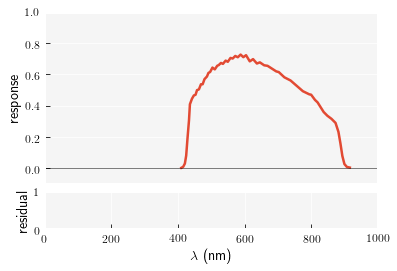

In [252]:
import IPython.display
image=IPython.display.Image(data='responseFunctions/keplerResponse.jpeg',retina=True)
IPython.display.display(image)

digitize=ascii.read('responseFunctions/keplerDigitize.csv')
ls=digitize['x']
rs=digitize['responseFunction']

rs=rs[ls<1e-6] # only look at points between 100 and 1000 nm
ls=ls[ls<1e-6]

#xs=[415,435,500,580,660,880,900]
#ys=[0,0.4,0.62,0.7,0.68,0.3,0]
#xs=np.array(xs)/1e9
#ys=np.array(ys)
xs=np.linspace(400,900,20)*1e-9
ys=np.array(interpolateYs(ls,rs,xs))
print('xs: ',xs)
print('ys: ',ys)

grid=mpl.gridspec.GridSpec(5,1)

keplerPlot=plt.subplot(grid[0:4])
keplerPlot.plot(1e9*ls,rs)
#keplerPlot.plot(1e9*xs,ys,c='k',lw=3,alpha=0.5)
keplerPlot.set_ylim(-0.1,1)
keplerPlot.set_xlim(0,1000)
keplerPlot.set_xticks([])
keplerPlot.axhline(0,c='k',lw=1,alpha=0.5)
keplerPlot.set_ylabel('response')

#plt.show()

resPlot=plt.subplot(grid[-1])
#resPlot.scatter(1e9*xs,(intYs-ys))
resPlot.set_xlim(0,1000)
resPlot.set_ylabel('residual')
resPlot.set_xlabel(r'$\lambda$ (nm)')
plt.show()


In [253]:
def interpolateYs(xs,ys,trapXs): #assumes xs in ascending order!
    diffs=np.array([trapX-xs for trapX in trapXs])
    diffs[diffs<0]=100 # want to make sure we always get the low index
    lowIndex=np.argmin(diffs,axis=1)
    below=trapXs-xs[lowIndex]
    if (np.max(lowIndex)==xs.size-1) | (xs[np.min(lowIndex)]<xs[0]):
        return np.inf*np.ones_like(trapXs) # can break if tryinging to sample xs beyond the recorded data
    above=xs[lowIndex+1]-trapXs
    intYs=ys[lowIndex]+(below/(below+above))*(ys[lowIndex+1]-ys[lowIndex])
    return intYs